In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

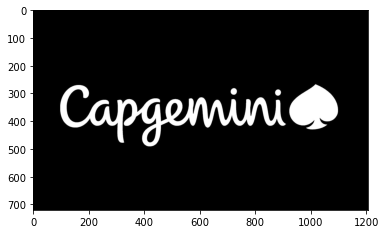

In [2]:
img = cv2.imread('CapgeminiLogo.png')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, 'gray')

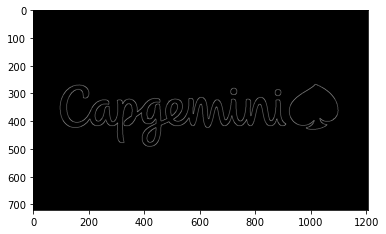

In [3]:
canny = cv2.Canny(img1,40, 400)
plt.imshow(canny, 'gray')

In [4]:
cntrs, ret = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(cntrs)))

Number of Contours found = 11


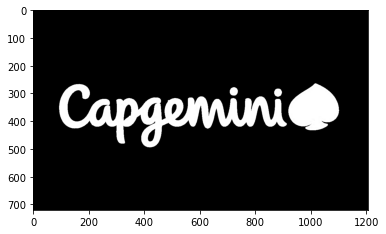

In [5]:
cv2.drawContours(img1, cntrs, -1, (255, 0, 0), 5)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

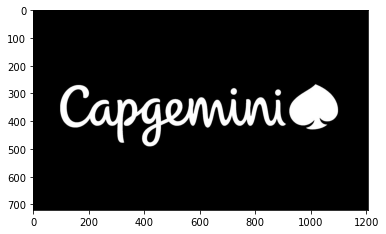

In [6]:
plt.imshow(img)

In [7]:
retr = [i for i in dir(cv2) if i.startswith('RETR_')]
print(retr)

['RETR_CCOMP', 'RETR_EXTERNAL', 'RETR_FLOODFILL', 'RETR_LIST', 'RETR_TREE']


Contours
Why Contours?

Issues with edges

Edges have no identity.
Edges have no continuity.
Edges cannot be easily counted and worked upon.
Edges cannot be differentiated from one another.
Edges in themselves have no defined shape.
Contours

Contours are an outline representing or bounding the shape or form of something.

Contours in image processing

Contours are designed using edges.
They are edges with an identity, geometrical parameters and are continuous.
They are useful for shape analysis and object recognition.

Contour detection using OpenCV

Retrieval methods

CV_RETR_EXTERNAL gives “outer” contours, so if you have (say) one contour enclosing another (like concentric circles), only the outermost is given.

CV_RETR_LIST gives all the contours and doesn’t even bother calculating the hierarchy — good if you only want the contours and don’t care whether one is nested inside another.

CV_RETR_CCOMP gives contours and organizes them into outer and inner contours. Every contour is either the outline of an object or the outline of an object inside another object (i.e. hole). The hierarchy is adjusted accordingly. This can be useful if (say) you want to find all the holes.

CV_RETR_TREE calculates the full hierarchy of the contours. So you can say that object1 is nested 4 levels deep within object2 and object3 is also nested 4 levels deep.
Contour properties

Contour Moments
2. Contour Area -> Area Enclosed inside a closed contour in pixels

3. Contour Perimeter — Number of pixels a contour covers in pixels

4. Contour approximation — Approximating the shape of a contour from an irregular shape.

5. Convex Hull

6. Bounding rectangle, circle, ellipse fitting across a contour.

Contour Moments
Moments are a set of statistical parameters to measure a distribution.
Three moments are commonly used:

1. Mean: the average.

2. Variance: an indication of how closely the values are spread about the mean.

3. Standard deviation: It is the square root of the variance.

In [61]:
# Laplacian kernel used to detect edge
laplacian = np.array(([0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]), dtype=int)

# Sobel x-axis kernel
sobelX = np.array(([-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]), dtype=int)

# Sobel y-axis kernel
sobelY = np.array(([-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]), dtype=int)

# Prewitt x-axis kernel
prewittX = np.array(([-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]), dtype=int)

# Prewitt y-axis kernel
prewittY = np.array(([-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]), dtype=int)

# Robert x-axis kernel
robertX = np.array(([1, 0],
                     [0, -1]), dtype=int)

# Robert y-axis kernel
robertY = np.array(([0, 1],
                    [-1, 0]), dtype=int)

# gaussian kernel

gauss = np.array(([1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]), dtype=int)

In [9]:
# getting through each and every pixel value and then
# multiplying them with the specified kernel values

def cnvltn(image, kernel):
    
    # getting the kernel height and width
    kh, kw = kernel.shape
    
    #checking the kernel, is it in proper square form
    if (kh == kw):
        
        # getting the image height and width as per convolution
        hgt, wdt = image.shape
        hgt = hgt - kh + 1
        wdt = wdt - kh + 1
    
        # creating a dark image to store the output
        blk_image = np.zeros((hgt, wdt))
        
        # iterating through the image dimensions
        for i in range(hgt):
            for j in range(wdt):
                
                # put back the convolved values to the dark image
                blk_image[i, j] = np.sum(image[i:i+kh, j:j+kh]*kernel)
                
    return blk_image

In [10]:
def gaus_kernel(filter_size, sigma):
    
    # required filter size 
    filter_size = int(filter_size) // 2
    
    
    sigma = int(sigma)
    
    # creating a blob with that filter size
    hgt, wdt = np.mgrid[-filter_size:filter_size+1, -filter_size:filter_size+1]
    
    # Using the Gaussian formula for computation
    gaus_const = 1 / (2.0 * np.pi * sigma**2)
    
    gauss =  np.exp(-((hgt**2 + wdt**2) / (2.0*sigma**2))) * gaus_const
    
    return gauss

In [11]:
edge = cnvltn(img1, laplacian)
plt.imshow(cv2.bitwise_and(edge), 'gray')

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'bitwise_and'
> Overload resolution failed:
>  - bitwise_and() missing required argument 'src2' (pos 2)
>  - bitwise_and() missing required argument 'src2' (pos 2)


In [12]:
# created a gaussian filter of size 5
gaus = gaus_kernel(5, 1)
print(gaus)

[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


Text(0.5, 1.0, 'After Gaussian Filtering')

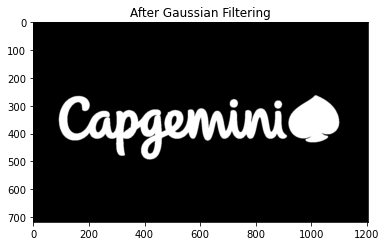

In [62]:
# applying convolution to the image with the above gaussian filter
# so that the noise present in the image will be reduced
can_gaus = cnvltn(img1, gauss)
plt.imshow(can_gaus, 'gray')
plt.title('After Gaussian Filtering')

Text(0.5, 1.0, 'Custom Canny Edge Detection')

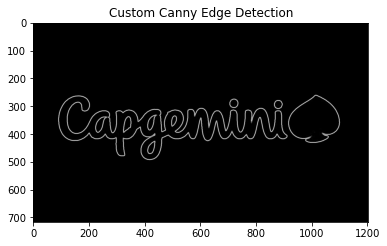

In [63]:
# using sobel filter values calculating the Canny edge
can_x = cnvltn(can_gaus, sobelX)
#plt.imshow(can_x, 'gray')
can_y = cnvltn(can_gaus, sobelY)
#plt.imshow(can_y, 'gray')

canny_img = np.sqrt(np.square(can_x) + np.square(can_y))
canny_img/=255

plt.imshow(canny_img, 'gray')
plt.title('Custom Canny Edge Detection')

In [58]:
canny_img.min()

0.0

In [ ]:
kernel = gaus_kernel(3, 1)

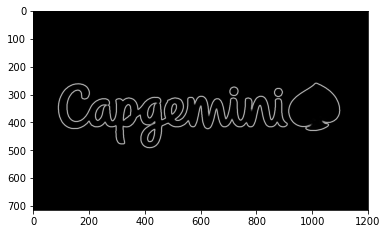

In [15]:
dark_img = canny_img.copy()
dark_img[:,:] = 0
for r in range(canny_img.shape[0]):
    for c in range(canny_img.shape[1]):
        if canny_img[r, c] != 0:
            dark_img[r, c] = canny_img[r, c]
        else:
            dark_img[r, c] = 0
            
            
plt.imshow(dark_img, 'gray')            

In [ ]:

#print (np.array(dark_img).max())
#print (np.array(dark_img).min())


In [16]:
dark_img = dark_img/255.0
# get coordinates (x,y)
xy_coords = np.flip(np.column_stack(np.where(dark_img != 0)), axis=0)
print(xy_coords)

[[494 437]
 [494 436]
 [494 435]
 ...
 [257 146]
 [257 145]
 [257 144]]


In [ ]:
mask = dark_img > 0
#mask_r = cv2.resize(mask, (720, 1201))
img[mask] = (255, 0, 0)

#plt.imshow(img)
cv2.imshow('img', img)

Number of Contours found = 11


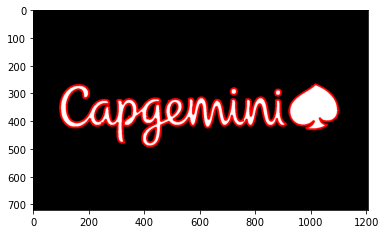

In [17]:
image = cv2.imread('CapgeminiLogo.png')
#cv2.waitKey(0)
  
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
#cv2.waitKey(0)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
#cv2.imshow('Canny Edges After Contouring', edged)
#cv2.waitKey(0)
  
print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (255, 0, 0), 5)
  
#cv2.imshow('Contours', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(image)

In [18]:
print(contours)

(array([[[441, 423]],

       [[440, 424]],

       [[439, 424]],

       [[438, 425]],

       [[437, 425]],

       [[436, 426]],

       [[435, 426]],

       [[434, 427]],

       [[433, 428]],

       [[432, 428]],

       [[431, 429]],

       [[430, 429]],

       [[429, 430]],

       [[428, 431]],

       [[427, 431]],

       [[426, 432]],

       [[425, 433]],

       [[424, 434]],

       [[423, 435]],

       [[422, 435]],

       [[422, 436]],

       [[421, 437]],

       [[420, 438]],

       [[419, 439]],

       [[418, 440]],

       [[417, 441]],

       [[416, 442]],

       [[416, 443]],

       [[415, 444]],

       [[415, 445]],

       [[414, 446]],

       [[414, 447]],

       [[413, 448]],

       [[413, 449]],

       [[412, 450]],

       [[412, 451]],

       [[412, 452]],

       [[411, 453]],

       [[411, 454]],

       [[411, 455]],

       [[411, 456]],

       [[411, 457]],

       [[410, 458]],

       [[410, 459]],

       [[410, 460]],

       [[

In [19]:
image = cv2.imread('CapgeminiLogo.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
h, w = image.shape[0], image.shape[1]

avg_kernel = gaus_kernel(5, 1)
kh, kw = avg_kernel.shape

dark_img2 = image.copy()
dark_img2[:, :] = 0

for row in range(h-kh+1):
    for col in range(w-kw+1):
        dark_img2[row, col] = np.sum(image[row:row + kh, col:col + kw] * avg_kernel)

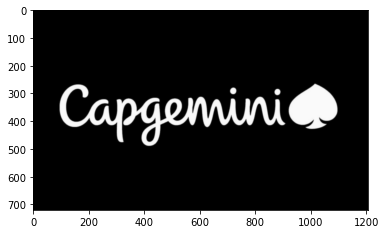

In [20]:
plt.imshow(cv2.cvtColor(dark_img2, cv2.COLOR_BGR2RGB))

In [32]:
dark_img2.min()

0

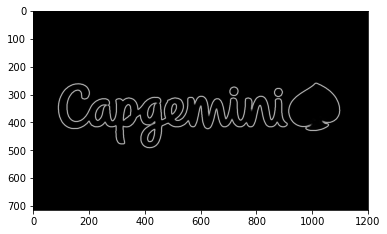

In [39]:
dark_img4 = canny_img.copy()
dark_img4[:,:] = 0
for r in range(canny_img.shape[0]):
    for c in range(canny_img.shape[1]):
        if canny_img[r, c] != 0:
            dark_img4[r, c] = canny_img[r, c]
        else:
            dark_img4[r, c] = 255
            
            
plt.imshow(dark_img4, 'gray')

In [41]:
dark_img4.max()

173602.36697165022

In [28]:
dark_img5 = dark_img4/255.0
# get coordinates (x,y)
pix_coords = np.flip(np.column_stack(np.where(dark_img5 >= 255)), axis=0)
print(pix_coords)

[[ 492  424]
 [ 492  423]
 [ 492  422]
 ...
 [ 260 1011]
 [ 259 1015]
 [ 259 1014]]


In [27]:
print(dark_img5.max())

680.7935959672558


In [30]:
cv2.drawContours(img, pix_coords, -1, (255, 0, 0), 5)
plt.imshow(img)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2502: error: (-215:Assertion failed) npoints > 0 in function 'cv::drawContours'
